<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# TRABAJO PRACTICO LABORATORIO
#### Autor: RICARDO RELOZ


# Síntesis de func. transferencia descargadas NO disipativas

## 1) Ej. 6 TP Síntesis de Cuadripolos) 
## Sintetizar un cuadripolo que cumpla con los siguientes parámetros:

\begin{equation}
Y_{11} = \frac{I1}{V1} \bigg\rvert_{V_2=0} = \frac{3s.(s^2 + 7/3)}{ (s^2 + 2) (s^2 + 5) }
\end{equation}

\begin{equation}
Y_{21} = \frac{I2}{V1} \bigg\rvert_{V_2=0} = \frac{s.(s^2 + 1)}{ (s^2 + 2) (s^2 + 5) }
\end{equation}

### a) Obtener la topología mediante la síntesis gráfica, es decir la red sin valores.
### b) Calcular el valor de los componentes, es decir la síntesis analítica.
### c) Verificar los parámetros en el cuadripolo sintetizado.

## 2) Sintetizar un cuadripolo que implemente la siguiente transferencia de tensiones en vacío:
\begin{equation}
\frac{V_2}{V_1} \bigg\rvert_{I_2=0} = \frac{(s^2 + 2) (s^2 + 9)}{ (s^2 + 1) (s^2 + 3) }
\end{equation}

### a) Obtener la topología mediante la síntesis gráfica, es decir la red sin valores.
### b) Calcular el valor de los componentes, es decir la síntesis analítica.
### c) Verificar los parámetros en el cuadripolo sintetizado.

Algunas pistas:

    Ojo con los componentes de cierre. Prestar atención a las condiciones de medición de las restricciones (parámetros, transferencias, etc)
    Verificar la topología obtenida analizando las transferencias prescritas en sus puntos clave, es decir extremos de banda, ceros de transferencia, etc.

    Ver ejercicios similares en el libro de Araujo, con varias alternativas de resolución.


Bonus:

    +20 💎 Simulación simbólica de la función transferencia
    +20 🎓 Simulación circuital de la red obtenida 
    +5 🍺 Presentación en jupyter notebook

## Ejercicio 1

### Solucion:
El metodo de sintesis consiste en implementar el cuadripolo desde su entrada, ya que conocemos Y11 y durante el transcurso de la sintesis, obligarla a satisfacer los que ceros que caracterizan Y21.
En primer lugamos, se ilustra de forma simbolica de forma analitica, y luego a traves del spider se encarga de obtener las ecuaciones precisas, y luego revertir el procesos generando el cuadripolo para verificar que se cumplan las transferencias.
PASOS
Primero se invirtio el Y11 y se llevo el celo mas cercano a 1 a traves de una remorcion parcial en 0
Luego se invirtio y elimino el polo, anteriormente un cero.
Luego se elimino el polo restante.
Posterior se rehizo el proceso pero a traves de Spyder.

<img src="./1imagen.jpeg" align="left" width="800" /> 


#### Admitancia de entrada a la red

<IPython.core.display.Math object>

[{s: 0}, {s: -sqrt(21)*I/3}, {s: sqrt(21)*I/3}]
[{s: -sqrt(2)*I}, {s: sqrt(2)*I}, {s: -sqrt(5)*I}, {s: sqrt(5)*I}]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

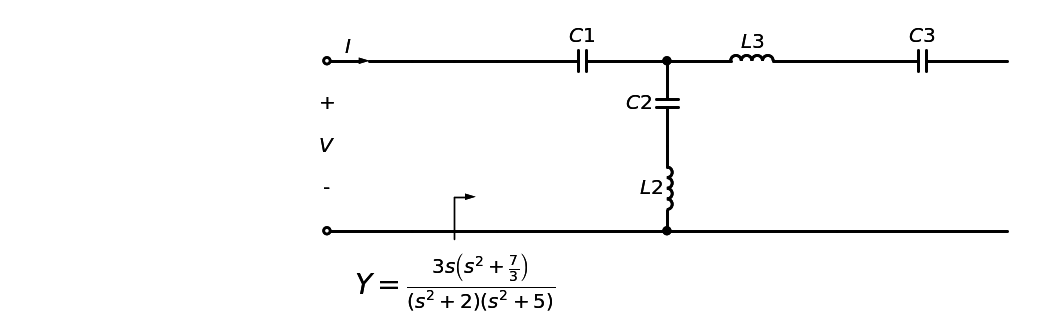

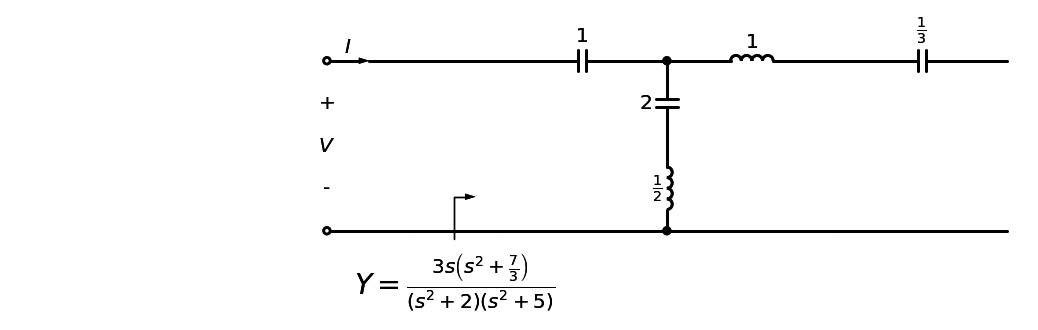

#### Calculos de verificacion

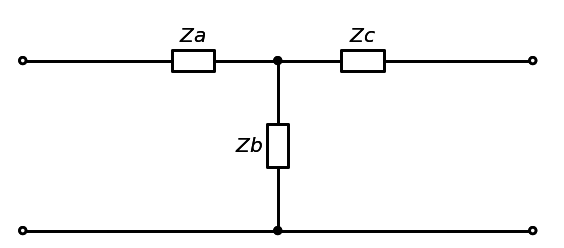

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import sympy as sp
from sympy import symbols, Matrix
from sympy import init_printing
from sympy import simplify
from sympy import symbols, expand, factor

from pytc2.general import to_latex

from schemdraw import Drawing

# Ahora importamos las funciones de PyTC2

from pytc2.remociones import remover_polo_dc, remover_polo_jw , remover_polo_jw2
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion,  dibujar_tanque_derivacion, dibujar_tanque_RC_serie,  dibujar_espacio_derivacion, Capacitor, Resistor, ResistorIEC
from pytc2.dibujar import dibujar_Pi, dibujar_Tee, dibujar_lattice

from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown

from pytc2.cuadripolos import Z2Tabcd_s, Y2Tabcd_s, Tabcd2Z_s, Tabcd2Y_s
from pytc2.cuadripolos import calc_MAI_impedance_ij, calc_MAI_vtransf_ij_mn, calc_MAI_ztransf_ij_mn
from pytc2.general import print_latex

# Activar la impresión en formato LaTeX
init_printing()
# Definir la variable simbólica s
s = sp.symbols('s',complex=True)

# Definir la función de transferencia H(s)
denominador = (s**2 + 2)*(s**2 + 5)
numerador = s *(3*s**2 + 7)
YY = numerador / denominador

print_subtitle('Admitancia de entrada a la red')

print_latex(a_equal_b_latex_s('Y(s)', YY))

##/////////////////////////////////////////////////////////////////////////////
##/////////////////////////////////////////////////////////////////////////////


# calculamos polos y ceros de Y(s)
num, den = YY.as_numer_denom()

roots_num = sp.solve(num, s, dict=True)
print(roots_num)

roots_den = sp.solve(den, s, dict=True)
print(roots_den)

# Restricción circuital: L2*C2 = 1 r/s
# remoción parcial en DC de 1/YY

Z2, Zc1 = remover_polo_dc(1/YY, omega_zero = 1 )

# Yc1 es la admitancia removida
# extraigo C1
C1 = 1/(s*Zc1)

print_latex(a_equal_b_latex_s('Z_1(s) = \\frac{k^p_0}{s}', Zc1))
print_latex(a_equal_b_latex_s('Z_2(s)', Z2))

##/////////////////////////////////////////////////////////////////////////////
##/////////////////////////////////////////////////////////////////////////////
Y4, Yt2, L2, C2 = remover_polo_jw2(1/Z2, isImpedance = False, omega = 1)

print_latex(a_equal_b_latex_s('Y_t3(s)', Yt2))
print_latex(a_equal_b_latex_s('Y_4(s)', Y4))

##/////////////////////////////////////////////////////////////////////////////
##/////////////////////////////////////////////////////////////////////////////

# quedaría solo un tanque en Y4, no especifico omega.
Y6, Yt3, L3, C3 = remover_polo_jw(Y4, isImpedance = False)

print_latex(a_equal_b_latex_s('Y_t5(s)', Yt3))
print_latex(a_equal_b_latex_s('Y_6(s)', Y6))

##/////////////////////////////////////////////////////////////////////////////
##/////////////////////////////////////////////////////////////////////////////
##/////////////////////////////////////////////////////////////////////////////
##/////////////////////////////////////////////////////////////////////////////

# Resolución simbólica
s = sp.symbols('s ', complex=True)

# Sea la siguiente función de excitación
YY = 3*s*(s**2+sp.Rational(7,3))/(s**2+2)/(s**2+5)

# Red ejemplo 1
d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d = dibujar_funcion_exc_abajo(d, 
                 'Y',  
                 YY, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_serie(d, 'C', 'C1')

d = dibujar_tanque_derivacion(d, 'L2', 'C2')

d = dibujar_elemento_serie(d, 'L', 'L3')

d = dibujar_elemento_serie(d, 'C', 'C3')
display(d)

##/////////////////////////////////////////////////////////////////////////////
##/////////////////////////////////////////////////////////////////////////////

# Dibujamos la red resultante:

d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d = dibujar_funcion_exc_abajo(d, 
                 'Y',  
                 YY, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_serie(d, 'C', C1)

d = dibujar_tanque_derivacion(d, L2, C2)

d = dibujar_elemento_serie(d, 'L', L3)

d = dibujar_elemento_serie(d, 'C', C3)

display(d)

##/////////////////////////////////////////////////////////////////////////////
##/////////////////////////////////////////////////////////////////////////////
##/////////////////////////////////////////////////////////////////////////////
##/////////////////////////////////////////////////////////////////////////////

print_subtitle('Calculos de verificacion')

Za, Zb, Zc = sp.symbols('Za, Zb, Zc', complex=True)

Ztee = sp.Matrix([[Za+Zb, Zb], [Zb, Zc + Zb]])

dibujar_Tee(Ztee)

Ztee_sym = sp.simplify(Ztee.subs(Za, 1/(s*C1)))
Ztee_sym = sp.simplify(Ztee_sym.subs(Zb, 1/(s*C2) + s*L2))
Ztee_sym = sp.simplify(Ztee_sym.subs(Zc, 1/(s*C3) + s*L3))

print_latex(a_equal_b_latex_s('Z_{tee}', Ztee_sym))

Ttee = Z2Tabcd_s(Ztee_sym)

Ytee = Tabcd2Y_s(Ttee)

print_latex(a_equal_b_latex_s('Y_{tee}', Ytee))

print_latex(a_equal_b_latex_s('Y_{11}', sp.factor(sp.simplify(sp.expand(Ytee[0])))) )

print_latex(a_equal_b_latex_s('Y_{21}', sp.factor(sp.simplify(sp.expand(Ytee[2])))) )


## Ejercicio 2

### Solucion
Al igual que el ejercicio 1, se resolvio del mismo modo sintetizando el ejercicio 2 de entrada a su salida, solo que en este caso solo teniamos la Transferencia V2/V1, la expresion es la resultante de efectuar el cociente grafico entre las graficas polos - ceros correspondientes a Z21 y Z11, como se ve en la imagen.
Ambas deben cumplir con alternancias de polos - ceros, cosa que no se ve, entonces para completar las Z21 y Z11 sin alterar transferencia, es agregar a ambos polos que mantenga la alternancia, y de modo que no variara en absoluto la transferencia. Luego se realizaria el analisis igual que en el Ejercicio 1
Como polos, se escogio la ecuacion.
Ya que permite la alternancia y al mismo tiempo es Impar

\begin{equation}
\mathrm{A}\left(\mathrm{s}\right)\mathrm{=s}(s^2+2.5)
\end{equation}

PASOS
Primero se corrio el polo de raiz(3) a raiz(9) mediante una remocion infinita parcial
Luego se invirtio y se removio por completo el polo que previamente era un cero
Despues se volvio invertir y se llevo el polo restante a raiz(2)
Luego se invirtio y se removio por completo el polo que previamente era un cero



<img src="./2imagen.jpeg" align="left" width="800" /> 


/home/ricardo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


#### Impedancia de entrada a la red

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

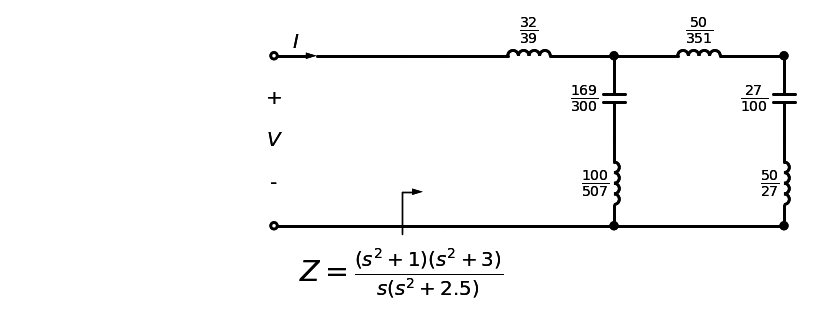

#### Calculos de verificacion

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import sympy as sp
from sympy import symbols, Matrix
from sympy import init_printing
from sympy import simplify
from sympy import symbols, expand, factor

from pytc2.general import to_latex

from schemdraw import Drawing

# Ahora importamos las funciones de PyTC2

from pytc2.remociones import remover_polo_dc, remover_polo_jw , remover_polo_jw2 ,remover_polo_infinito , remover_polo_dc2 , remover_polo_infinito2
from pytc2.dibujar import display, dibujar_tanque_serie, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion,  dibujar_tanque_derivacion, dibujar_tanque_RC_serie,  dibujar_espacio_derivacion, Capacitor, Resistor, ResistorIEC
from pytc2.dibujar import dibujar_Pi, dibujar_Tee, dibujar_lattice

from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown

from pytc2.cuadripolos import Z2Tabcd_s, Y2Tabcd_s, Tabcd2Z_s, Tabcd2Y_s
from pytc2.cuadripolos import calc_MAI_impedance_ij, calc_MAI_vtransf_ij_mn, calc_MAI_ztransf_ij_mn
from pytc2.general import print_latex

# Activar la impresión en formato LaTeX
init_printing()
# Definir la variable simbólica s
s = sp.symbols('s',complex=True)

# Definir la función de transferencia H(s)
numerador = (s**2 + 1)*(s**2 + 3)
denominador = s *(s**2 + 2.5)
Z11 = numerador / denominador

print_subtitle('Impedancia de entrada a la red')
print_latex(a_equal_b_latex_s('Z(s)', Z11))

##/////////////////////////////////////////////////////////////////////////////
##/////////////////////////////////////////////////////////////////////////////

Z2, Zt1 = remover_polo_infinito(Z11, omega_zero=3)
L1 = Zt1/s
L1 = sp.nsimplify(L1)
Z2 = sp.nsimplify(sp.factor(Z2))
Zt1 = sp.nsimplify(sp.factor(Zt1))

print_latex(a_equal_b_latex_s('Zt1(s)', Zt1))
print_latex(a_equal_b_latex_s('Z2(s)', Z2))

##/////////////////////////////////////////////////////////////////////////////
##/////////////////////////////////////////////////////////////////////////////

Y4, Yt3 , L2, C2 = remover_polo_jw(1/Z2, omega=3, isImpedance=False)
L2 = sp.nsimplify(L2)
C2 = sp.nsimplify(C2)
Y4 = sp.nsimplify(sp.factor(Y4))
Yt3 = sp.nsimplify(sp.factor(Yt3))

print_latex(a_equal_b_latex_s('Yt3(s)', Yt3))
print_latex(a_equal_b_latex_s('Y4(s)', Y4))

##/////////////////////////////////////////////////////////////////////////////
##/////////////////////////////////////////////////////////////////////////////

Z6, Zt5 = remover_polo_infinito2(1/Y4, omega_zero=2)
L3 = Zt5/s
L3 = sp.nsimplify(L3)
Zt5 = sp.nsimplify(sp.factor(Zt5))

print_latex(a_equal_b_latex_s('Zt5(s)', Zt5))
print_latex(a_equal_b_latex_s('Z6(s)', Z6))

##/////////////////////////////////////////////////////////////////////////////
##/////////////////////////////////////////////////////////////////////////////

Y8, Yt7 , L4, C4 = remover_polo_jw2(1/Z6, omega=2, isImpedance=False)
L4 = sp.nsimplify(L4)
C4 = sp.nsimplify(C4)
Y8 = sp.nsimplify(sp.factor(Y8))
Yt7 = sp.nsimplify(sp.factor(Yt7))

print_latex(a_equal_b_latex_s('Yt7(s)', Yt7))
print_latex(a_equal_b_latex_s('Y8(s)', Y8))


##/////////////////////////////////////////////////////////////////////////////
##/////////////////////////////////////////////////////////////////////////////
##/////////////////////////////////////////////////////////////////////////////
##/////////////////////////////////////////////////////////////////////////////

# Dibujamos la red resultante:

d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d = dibujar_funcion_exc_abajo(d, 
                 'Z',  
                 Z11, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_serie(d, 'L', L1)

d = dibujar_tanque_derivacion(d, L2, C2)

d = dibujar_elemento_serie(d, 'L', L3)

d = dibujar_tanque_derivacion(d,  L4, C4)

display(d)

##/////////////////////////////////////////////////////////////////////////////
##/////////////////////////////////////////////////////////////////////////////
##/////////////////////////////////////////////////////////////////////////////
##/////////////////////////////////////////////////////////////////////////////

print_subtitle('Calculos de verificacion')

Za1,Zb1 = sp.symbols('Za1 , Zb1', complex=True)
Za2,Zb2 = sp.symbols('Za2 , Zb2', complex=True)


T1 = sp.Matrix([[ 1 + Za1/Zb1 , Za1 ], [1/Zb1 , 1]])

T2 = sp.Matrix([[ 1 + Za2/Zb2 , Za2 ], [1/Zb2 , 1]])

print_latex(a_equal_b_latex_s('T_{1}', T1))
print_latex(a_equal_b_latex_s('T_{2}', T2))

TT = T1 * T2;

print_latex(a_equal_b_latex_s('T_{T}', TT))

TT_sym = sp.simplify(TT.subs(Za1, s*L1) ) 
TT_sym = sp.simplify(TT_sym.subs(Zb1, 1/(s*C2) + L2*s ))
TT_sym = sp.simplify(TT_sym.subs(Za2, s*L3 ) )
TT_sym = sp.simplify(TT_sym.subs(Zb2, 1/(s*C4) + L4*s ))

print_latex(a_equal_b_latex_s('T_{T}', TT_sym))


Tt_ori = 1/ TT_sym[0];
num , den = Tt_ori.as_numer_denom()


print_latex(a_equal_b_latex_s('TtEJ_{11}', sp.factor(sp.simplify(sp.expand(Tt_ori)))) )






## Conclusiones y Reflexiones
La síntesis de funciones de transferencia descargadas no disipativas en sistemas  electrónicos es una técnica fundamental para diseñar redes que no disipan energía, como los filtros reactivos (inductores y capacitores). En este proceso, el enfoque está en construir funciones de transferencia que cumplan con los requisitos de estabilidad y eficiencia energética, garantizando que no haya pérdidas resistivas.
Reflexionar sobre esta técnica resalta la importancia de optimizar tanto el rendimiento como la eficiencia en el diseño de sistemas, garantizando la transferencia de energía sin pérdida significativa.